In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt

# Datasource: US Census.gov

### - Employment data by County
#### -- county (county/state)
#### -- labor_force
#### -- employed
#### -- unemployed_pct

### - Demographic population and race data by County

#### -- county (county/state)
#### -- population
#### -- race_white
#### -- race_black
#### -- race_native
#### -- race_asian
#### -- race_islander
#### -- race_other
#### -- race_two_or_more

---

# This model uses these X columns:
---
#### - race_white
#### - race_black
#### - race_asian
#### - race_other (combined race_other, race_islander, race_native)
#### - race_two_or_more

---

## To Predict one of these Y column:

# labor_force
# employed
# unemployed

---

There are sample tests way at the bottom that simulates simulate the response the user would get if we were to provide them with a form for them to enter in values and hit submit. 

The tests below shows you the "change" in labor_force.


---

In [2]:
employment_county_df  = pd.read_csv('Employment_by_County.csv', index_col=0)
employment_county_df.head(5)

,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more
0,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157
2,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024
4,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700
6,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759
8,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656


# Copy of the dataframe to feed ML 



In [3]:
employment_county_copy = employment_county_df.copy()

In [4]:
employment_county_copy.columns.to_list()

['county',
 'labor_force',
 'employed',
 'unemployed',
 'unemployed_pct',
 'population',
 'race_white',
 'race_black',
 'race_native',
 'race_asian',
 'race_islander',
 'race_other',
 'race_two_or_more']

In [5]:
employment_county_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3127 entries, 0 to 3193
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   county            3127 non-null   object 
 1   labor_force       3127 non-null   int64  
 2   employed          3127 non-null   int64  
 3   unemployed        3127 non-null   int64  
 4   unemployed_pct    3127 non-null   float64
 5   population        3127 non-null   int64  
 6   race_white        3127 non-null   int64  
 7   race_black        3127 non-null   int64  
 8   race_native       3127 non-null   int64  
 9   race_asian        3127 non-null   int64  
 10  race_islander     3127 non-null   int64  
 11  race_other        3127 non-null   int64  
 12  race_two_or_more  3127 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 342.0+ KB


In [6]:
employment_county_copy['race_others']= employment_county_copy[['race_native','race_islander','race_other']].sum(axis=1)
employment_county_copy.head(5)

,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,race_others
0,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157,1162
2,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024,7060
4,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700,1156
6,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759,534
8,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656,3792


In [7]:
# reducing columns to improve model performance 
employment_county_copy = employment_county_copy.drop(['race_native','race_islander','race_other'],axis=1)

In [8]:
employment_county_copy.isnull().values.any()

False

In [9]:
employment_county_copy.shape

(3127, 11)

In [10]:
employment_county_copy.columns.to_list()

['county',
 'labor_force',
 'employed',
 'unemployed',
 'unemployed_pct',
 'population',
 'race_white',
 'race_black',
 'race_asian',
 'race_two_or_more',
 'race_others']

In [11]:
employment_county_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3127 entries, 0 to 3193
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   county            3127 non-null   object 
 1   labor_force       3127 non-null   int64  
 2   employed          3127 non-null   int64  
 3   unemployed        3127 non-null   int64  
 4   unemployed_pct    3127 non-null   float64
 5   population        3127 non-null   int64  
 6   race_white        3127 non-null   int64  
 7   race_black        3127 non-null   int64  
 8   race_asian        3127 non-null   int64  
 9   race_two_or_more  3127 non-null   int64  
 10  race_others       3127 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 293.2+ KB


# Targeting "labor_force" but we can target any of the employment columns

- labor_force
- employed
- unemployed_pct

In [46]:
X = employment_county_copy[['race_white', 'race_black', 'race_asian', 'race_two_or_more', 'race_others']]
y = employment_county_copy['labor_force'] 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)

In [48]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [94]:
y_pred = regressor.predict(X_test)

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9868314395878602

In [96]:
regressor.score(X_train,y_train)

0.9697182692599148

In [97]:
regressor.score(X_test,y_test)

0.9868314395878602

In [98]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

4393.321405750799

## Feature importance

In [104]:
sorted(zip(regressor.feature_importances_, X.columns), reverse=True)

[(0.4457166435612761, 'race_white'),
 (0.299531138918742, 'race_two_or_more'),
 (0.14002721604917454, 'race_others'),
 (0.10122664522362387, 'race_asian'),
 (0.013498356247183475, 'race_black')]

### MAE seem a bit high, but consider the min max range

In [54]:
max_labor_force = employment_county_df['labor_force'].max()
min_labor_force = employment_county_df['labor_force'].min()
print ('min = ', min_labor_force)
print('max = ', max_labor_force)

min =  184
max =  4921499


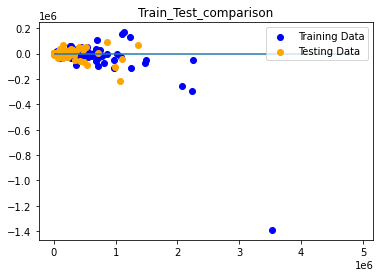

In [55]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Train_Test_comparison")
plt.show()

In [56]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(regressor.predict(X_test[:10]))}')

Actual:		[5008, 42560, 3093, 649, 181868, 20710, 17154, 52246, 5561, 19460]
Predicted:	[5073.4, 42210.7, 3475.4, 702.8, 183322.9, 19679.4, 14930.8, 60911.8, 5823.4, 17473.4]


# START MODEL TESTING

- A random row was selected to use as baseline values for comparison
- Ran the prediction 5 times
 - each time changing the population of a race by N
- Prints out the change in labor_force

# TEST A : Start with a random Baseline as reference

In [57]:
(X_test[:1])

,race_white,race_black,race_asian,race_two_or_more,race_others
2606,7448,1898,108,1279,1731


In [58]:
baselineA = regressor.predict(X_test[:1])[0]
print (f"TEST A : Baseline labor_force before change {baselineA}")

TEST A : Baseline labor_force before change 5073.4


## Change in labor_force when 1000 to each race

In [59]:
# increase white by 1000
prediction = regressor.predict([[8448,1898,108,1279,1731]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 5339.5, a change of 266.10000000000036


In [60]:
# increase black by 1000
prediction = regressor.predict([[7448,2898,108,1279,1731]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 5144.2, a change of 70.80000000000018


In [61]:
# increase asian by 1000
prediction = regressor.predict([[7448,1898,1108,1279,1731]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 5703.3, a change of 629.9000000000005


In [62]:
# increase race_two_or_more by 1000
prediction = regressor.predict([[7448,1898,108,2279,1731]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 5531.9, a change of 458.5


In [63]:
# increase race_others by 1000
prediction = regressor.predict([[7448,1898,108,1279,2731]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 5060.1, a change of -13.299999999999272


# TEST B : Start with a random Baseline as reference

In [64]:
(X_test[4:5])

,race_white,race_black,race_asian,race_two_or_more,race_others
1203,126462,208273,10703,24666,13893


In [65]:
baselineB = regressor.predict(X_test[4:5])[0]
print (f"TEST B : Baseline labor_force = {baselineB}")

TEST B : Baseline labor_force = 183322.9


## Change in labor_force when adding 10000 to each race

Case: County is predominately Black

In [86]:
# increase white by 10000
prediction = regressor.predict([[226462,208273,10703,24666,13893]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 199708.5, a change of 16385.600000000006


In [80]:
# increase black by 10000
prediction = regressor.predict([[126462,268273,10703,24666,13893]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 183322.9, a change of 0.0


In [68]:
# increase asian by 10000
prediction = regressor.predict([[126462,208273,20703,24666,13893]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 192548.8, a change of 9225.899999999994


In [69]:
# increase race_two_or_more by 10000
prediction = regressor.predict([[126462,208273,10703,34666,13893]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 186584.8, a change of 3261.899999999994


In [70]:
# increase race_others by 10000
prediction = regressor.predict([[126462,208273,10703,24666,23893]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 184136.6, a change of 813.7000000000116


# TEST C : Start with a random Baseline as reference

In [71]:
(X_test[347:348])

,race_white,race_black,race_asian,race_two_or_more,race_others
2940,44672,12417,292,2129,991


In [72]:
baselineC = regressor.predict(X_test[347:348])[0]
print (f"TEST C : Baseline labor_force = {baselineC}")

TEST C : Baseline labor_force = 25669.3


## Change in labor_force when 1000 to each race

In [73]:
# increase white by 1000
prediction = regressor.predict([[45672,12417,292,2129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 26100.8, a change of 431.5


In [83]:
# increase black by 1000
prediction = regressor.predict([[44672,35417,292,2129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 30090.5, a change of 4421.200000000001


In [75]:
# increase asian by 1000
prediction = regressor.predict([[44672,12417,1292,2129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 27464.0, a change of 1794.7000000000007


In [76]:
# increase race_two_or_more by 1000
prediction = regressor.predict([[44672,12417,292,3129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 26364.8, a change of 695.5


In [43]:
# increase race_others by 1000
prediction = regressor.predict([[44672,12417,292,2129,1991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 26945.2, a change of 1275.9000000000015
